Модель рекуррентной сети с цепью нейросетевых моделей долгой кратковременной памяти 

In [420]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from math import sin, cos
from tqdm import tqdm
from random import random

In [527]:
seq_len = 20

batch_size = 10 

train_size = 0.8

data_range = np.linspace(0,200,1000) 
data = [[0.5*cos(2*i)-sin(2*i)+cos(i/2)] for i in data_range]



train_data = data[:int(train_size*len(data))]
test_data = data[int(train_size*len(data)):]

train_target = train_data[seq_len:]

test_data_range = data_range[int(train_size*len(data)):]

train = tf.keras.utils.timeseries_dataset_from_array(
      data=train_data,
      targets=train_target,
      sequence_length=seq_len,
      batch_size=batch_size,)

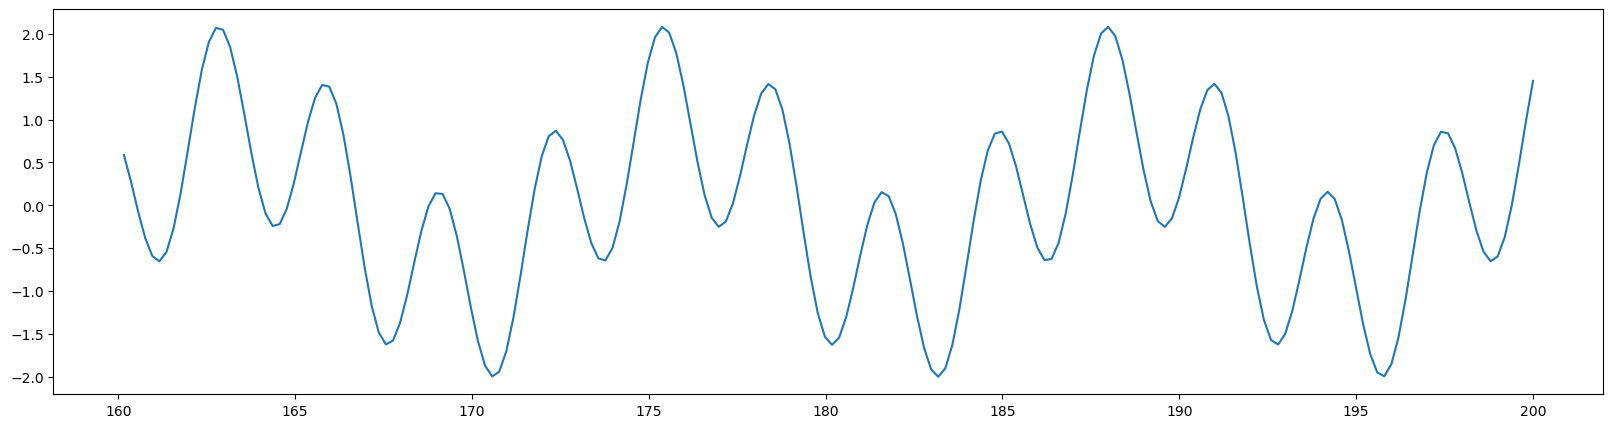

In [528]:
plt.plot(test_data_range, test_data)

Архитектура обычной реккурентной нейронной сети 
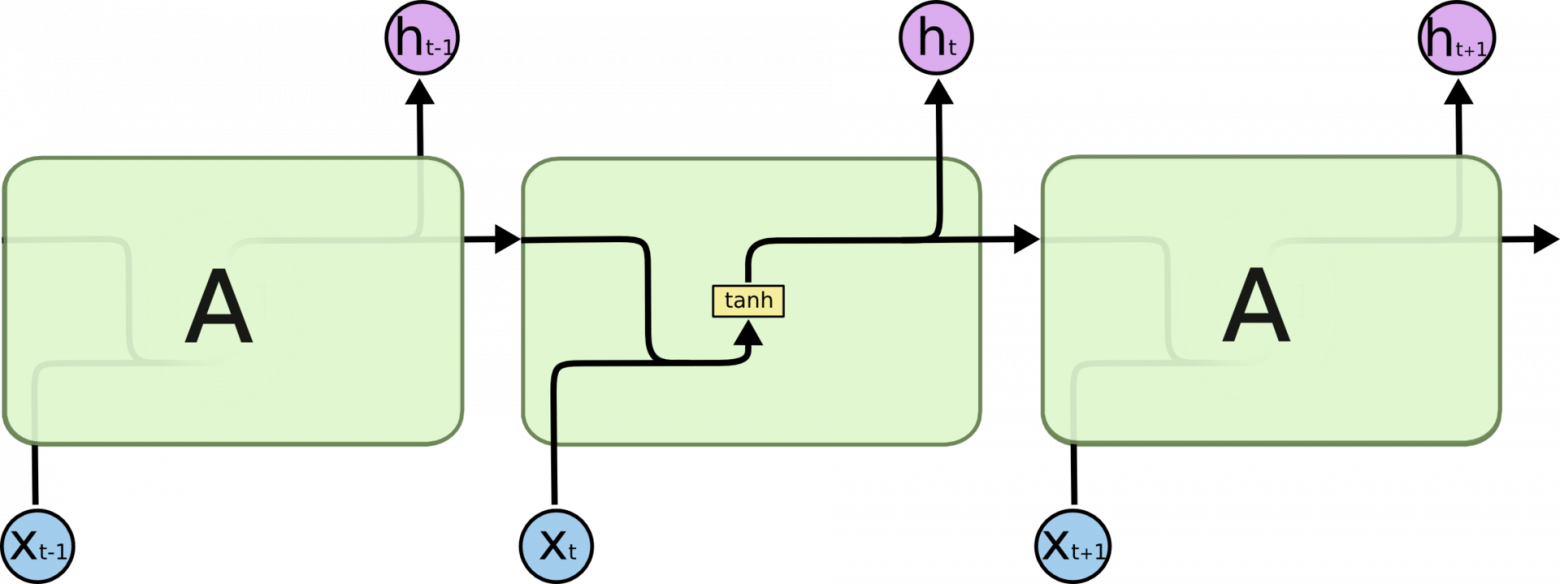


Архитектура LSTM – сети долгой краткосрочной памяти
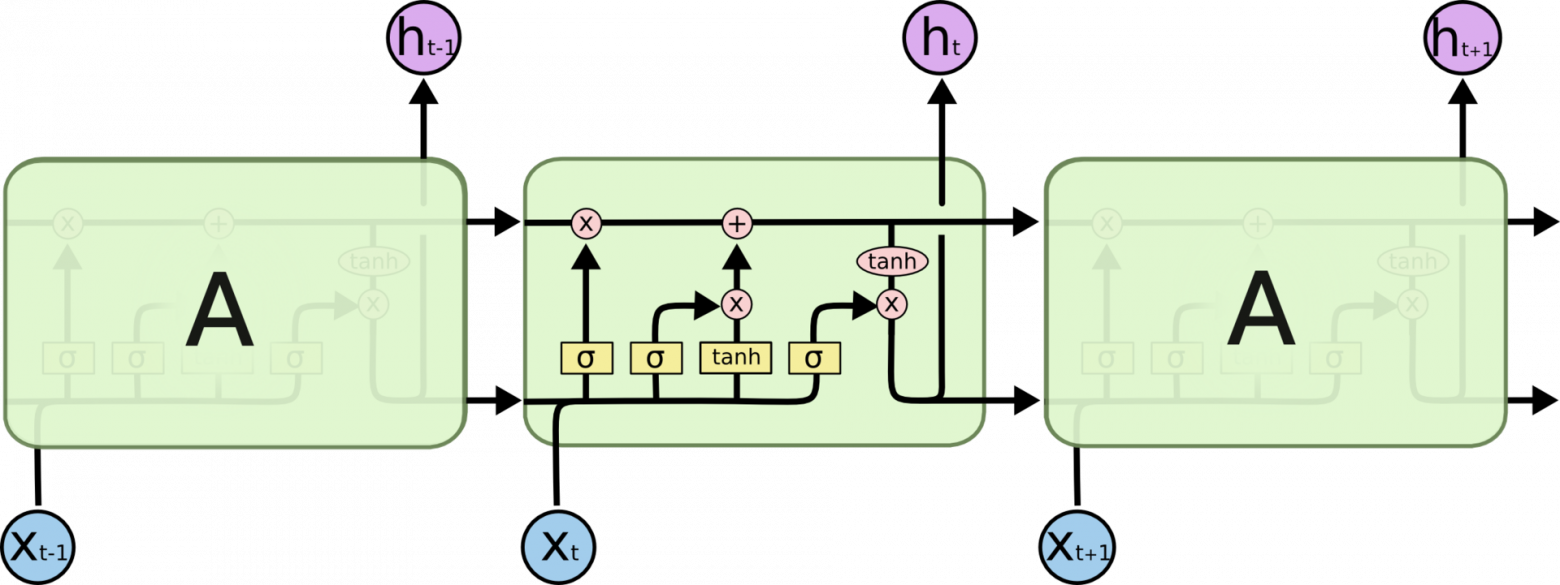

In [529]:
class LSTM:
    def __init__(self):
        self.model = tf.keras.models.Sequential([
                    tf.keras.layers.InputLayer(input_shape=(seq_len,1)),
                    tf.keras.layers.LSTM(10, return_sequences = False),
                    tf.keras.layers.Dense(units=1)
                    ])
        self.compile()
        
    def compile(self):
        self.model.compile(loss=tf.losses.Huber(),
            optimizer=tf.optimizers.Adam(learning_rate=0.01),
            metrics=[tf.metrics.MeanAbsoluteError()])

        self.model.build()
        self.model.summary()
        
    def train(self, data, epochs = 10):
        for _ in range(epochs):
            self.model.fit(train,
                          validation_data=None,
                          )
    def test(self, test):
        rez = [test[i][0] for i in range(seq_len)]
        lenght = len(test) - seq_len
        start = [test[:seq_len]]
        for i in tqdm(range(lenght)):
            next = float(self.model.predict(start, verbose = 0)[0][0])
            start[0] = start[0][1:]
            start[0].append([next])
            rez.append(next)
            
        return rez
        

In [530]:
L = LSTM()

Model: "sequential_81"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_85 (LSTM)              (None, 10)                480       
                                                                 
 dense_81 (Dense)            (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [537]:
L.train(train)

78/78 [==============================] - 0s 6ms/step - loss: 6.4014e-04 - mean_absolute_error: 0.0275


In [538]:
prediction = L.test(test_data)

100%|████████████████████████████████████████████████████████████████████████████████| 180/180 [00:13<00:00, 13.73it/s]


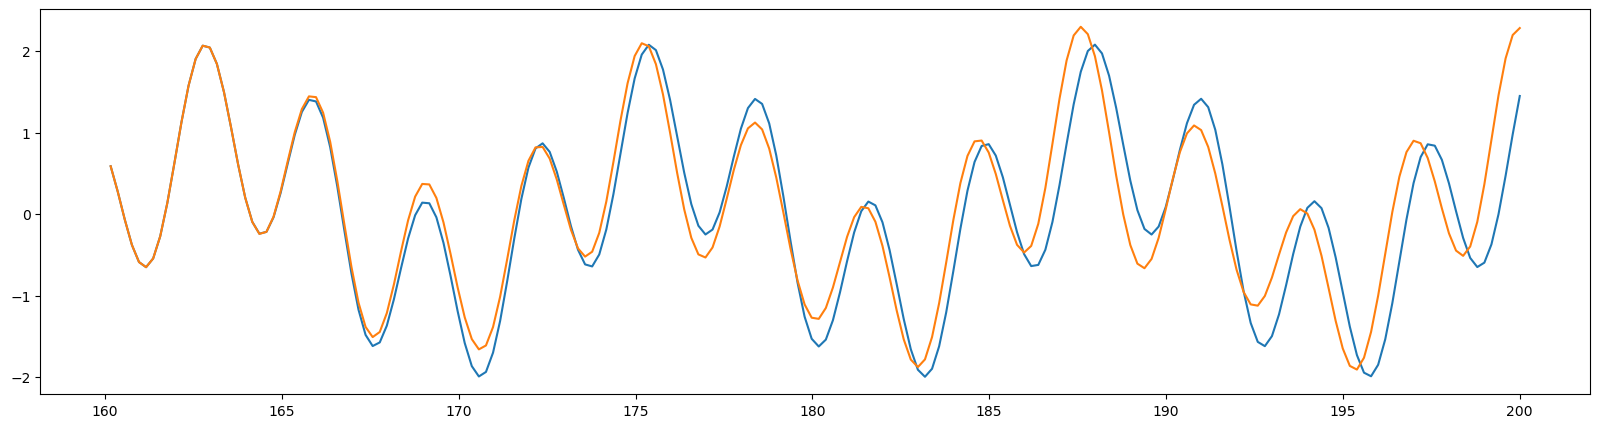

In [539]:
plt.rcParams["figure.figsize"] = (20,5)
plt.plot(test_data_range, test_data)
plt.plot(test_data_range, prediction)